In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys
import random

## Вспомогательные методы

Метод расчета расстояния между точками

In [2]:
def dist(x1, y1, x2, y2):
    return np.sqrt((x1-x2)**2+(y1-y2)**2)

Метод knn

In [3]:
def knn(data, train, k):
    clusters = []
    cl = 3
    for i in range(len(data)):
        distances = []
        for j in range(len(train)):
            distances.append([dist(data[i][0], data[i][1], train[j][0][0], train[j][0][1]), train[j][1]])
        idx = sorted(distances)[:k]
        clusters_c = {0:0, 1:0, 2:0}
        for j in range(len(idx)):
            clusters_c[idx[j][1]] += 1
        max_v = max(clusters_c[j] for j in range(0, cl))
        max_c = 0
        for clust, total in clusters_c.items():
            if total == max_v:
                max_c = clust
        clusters.append(max_c)
    return clusters

Генерация данных

In [4]:
def generateData(numberOfClassEl, numberOfClasses):
    data = []
    for classNum in range(numberOfClasses):
        centerX, centerY = random.random()*5.0, random.random()*5.0
        for rowNum in range(numberOfClassEl):
            data.append([ [random.gauss(centerX,0.5), random.gauss(centerY,0.5)], classNum])
    return data

In [6]:
def plot(x, y, color='b'):
    plt.scatter(x, y, c=color)

## Пример

Создание тренировочной и тестовой выборки

In [5]:
all_data = generateData(300, 3)
data = [all_data[i][0] for i in range(len(all_data)) if i % 2 == 0]
train = [all_data[i] for i in range(len(all_data)) if i % 2 != 0]

График существующих кластеров

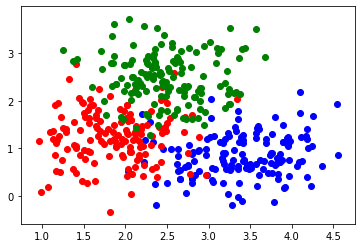

In [7]:
for i in range(len(train)):
    color = 'b'
    if train[i][1] == 1:
        color = 'r'
    elif train[i][1] == 2:
        color = 'g'
    plot(train[i][0][0], train[i][0][1], color)

Данные для кластеризации

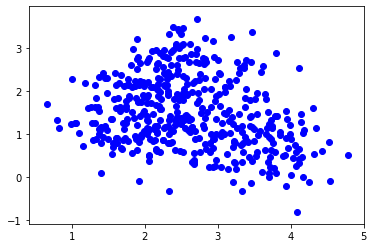

In [8]:
for i in range(len(data)):
    plot(data[i][0], data[i][1])

Запускаем метод

In [9]:
k = 5
clusters = knn(data, train, k)

График получившихся кластеров

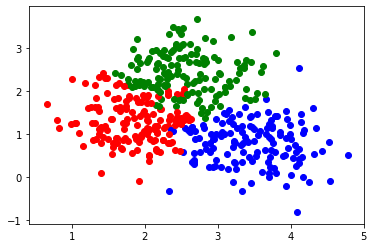

In [10]:
for i in range(len(data)):
    color = 'b'
    if clusters[i] == 1:
        color = 'r'
    elif clusters[i] == 2:
        color = 'g'
    plot(data[i][0], data[i][1], color)

Графики данных и полученных кластеров(полученные ярче)

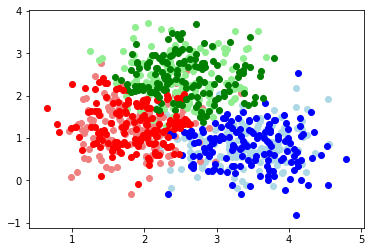

In [12]:
for i in range(len(train)):
    if train[i][1] == 0:
        plt.scatter(train[i][0][0], train[i][0][1], c='lightblue')
    elif train[i][1] == 1:
        plt.scatter(train[i][0][0], train[i][0][1], c='lightcoral')
    elif train[i][1] == 2:
        plt.scatter(train[i][0][0], train[i][0][1], c='lightgreen')
for i in range(len(clusters)):
    if clusters[i] == 0:
        plt.scatter(data[i][0], data[i][1], c='b')
    elif clusters[i] == 1:
        plt.scatter(data[i][0], data[i][1], c='r')
    elif clusters[i] == 2:
        plt.scatter(data[i][0], data[i][1], c='g')